In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

# Часть 1
## Анализ набора данных Wine Quality (UCI)  
Данные взяты с сайта UCI Machine Learning Repository:
https://archive.ics.uci.edu/ml/datasets/Wine+Quality

### 2) Описание данных  
Датасет содержит физико-химические характеристики различных образцов красного и белого вина, а также оценку качества вина (quality) по шкале от 0 до 10, выставленную экспертами.

Структура данных:

12 признаков: 11 числовых (физико-химические свойства) и 1 целевая переменная — качество (целочисленная).
Признаки включают: 
* fixed acidity: фиксированная кислотность
* volatile acidity: летучая кислотность
* citric acid: лимонная кислота
* residual sugar: остаточный сахар
* chlorides: хлориды
* free sulfur dioxide: свободный диоксид серы
* total sulfur dioxide: общий диоксид серы
* density: плотность
* pH: pH
* sulphates: сульфаты
* alcohol: содержание алкоголя
* quality: качество (целевой признак)

Задача — предсказать качество вина по физико-химическим параметрам (регрессия или классификация).  
Визуализация поможет понять распределения, зависимости и выбросы.

### 3) Загрузка и подготовка данных

In [7]:

# Загрузка данных
url_red = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
url_white = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv"

# Данные разделены точкой с запятой, указываем sep=';'
df_red = pd.read_csv(url_red, sep=';')
df_white = pd.read_csv(url_white, sep=';')

# Добавим столбец типа вина
df_red['type'] = 'red'
df_white['type'] = 'white'

# Объединим датасеты
df = pd.concat([df_red, df_white], axis=0).reset_index(drop=True)

df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


### 4) Первичный (разведочный) анализ с интерактивной визуализацией

#### 4a) Проверка пропущенных значений и выбросов  

In [4]:
# Проверка пропущенных значений
print("Пропущенные значения в каждой колонке:")
print(df.isnull().sum())

Пропущенные значения в каждой колонке:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
type                    0
dtype: int64


Вывод: пропущенных значений нет.

Выбросы — интерактивные boxplot по признакам.  
Некоторые признаки (например, residual sugar, free sulfur dioxide) имеют выбросы.
Это может быть важно при дальнейшем моделировании.

In [5]:
import plotly.express as px
import plotly.graph_objects as go
import numpy as np

In [6]:
features = df.columns[:-2]  # все кроме 'quality' и 'type'

fig = go.Figure()

for feature in features:
    fig.add_trace(go.Box(y=df[feature], name=feature, boxpoints='outliers'))

fig.update_layout(title="Boxplot для признаков (выбросы)",
                  height=600, width=900)
fig.show()

#### 4b) Зависимости между признаками
Интерактивная тепловая карта корреляций. Хорошо видна сильная корреляция между total sulfur dioxide и free sulfur dioxide.
Качество (quality) умеренно коррелирует с алкоголем (alcohol) и кислотностью (volatile acidity).

In [10]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white


In [11]:
df.columns[:-1]

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [12]:
corr = df.drop(columns=['type']).corr()

fig = px.imshow(corr, text_auto=True, aspect="auto", title="Корреляционная матрица признаков")
fig.show()

#### 4c) Частоты категориальных признаков
Категориальный признак — тип вина (type). На графике мы видим, что в выборке больше белого вина, чем красного.

In [8]:
fig = px.histogram(df, x='type', title='Распределение по типу вина')
fig.show()

#### 4d) Анализ целевой переменной (quality)
Распределение качества. Оценки качества варьируются от 3 до 9. Красное вино чаще имеет оценки 5-6, белое — более равномерно распределено.

In [ ]:
fig = px.histogram(df, x='quality', color='type', barmode='group',
                   title='Распределение оценок качества вина по типам')
fig.show()

#### 4e) Дополнительные визуализации
Scatter plot: алкоголь vs качество с цветом по типу вина. Видна тенденция: с увеличением алкоголя качество, как правило, выше.

In [ ]:
fig = px.scatter(df, x='alcohol', y='quality', color='type',
                 title='Зависимость качества от содержания алкоголя',
                 labels={'alcohol':'Алкоголь (%)', 'quality':'Качество'})
fig.show()

Парные графики (pairplot) для нескольких признаков

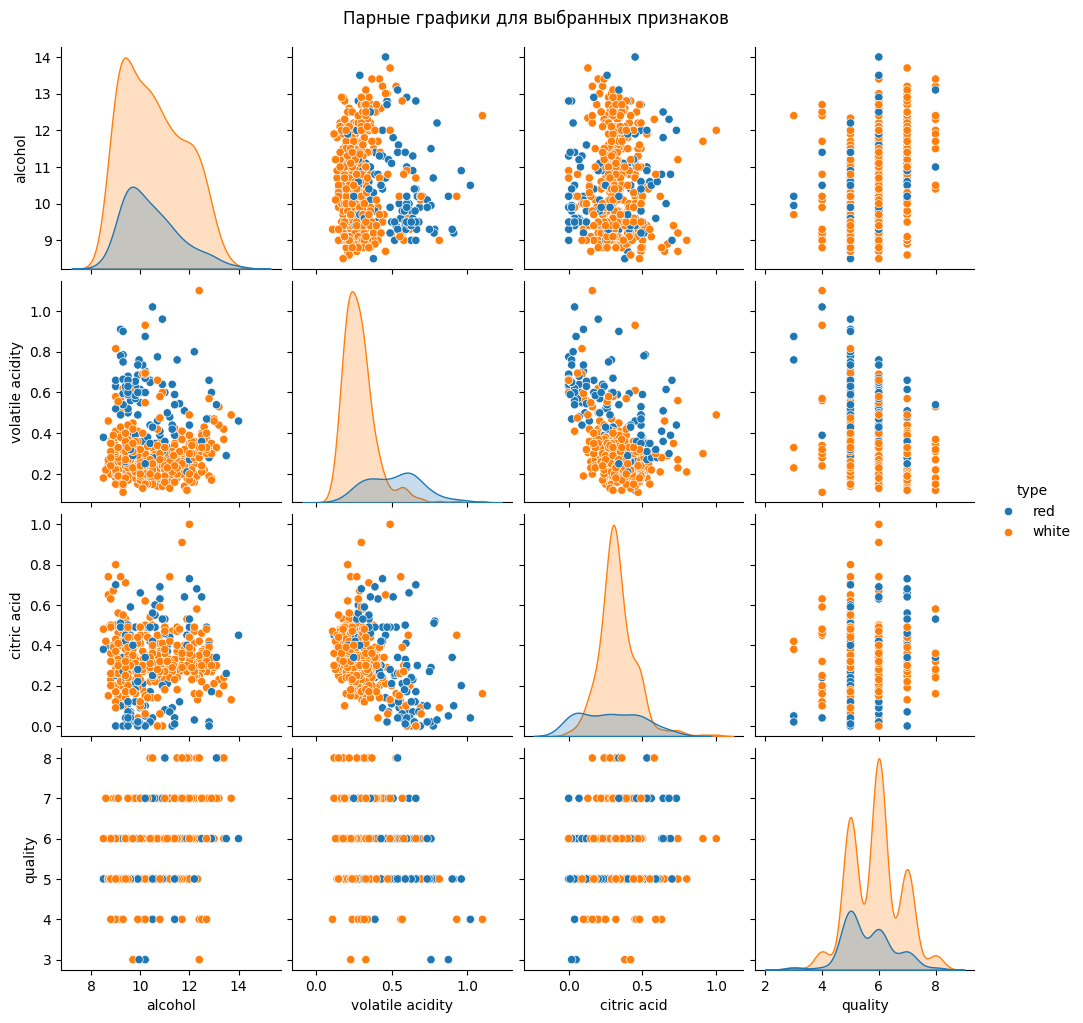

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df.sample(500), vars=['alcohol', 'volatile acidity', 'citric acid', 'quality'],
             hue='type', diag_kind='kde')
plt.suptitle('Парные графики для выбранных признаков', y=1.02)
plt.show()

#### 5) Выводы

* Пропущенных значений нет, что упрощает анализ.
* Выбросы присутствуют в некоторых признаках, их стоит учитывать при построении моделей (например, с помощью robust методов или удаления).
* Между признаками есть сильные корреляции (например, между различными типами диоксида серы).
* Целевая переменная — качество — имеет дискретное распределение, что позволяет рассматривать задачу как классификацию (например, многоклассовую) или регрессию с целочисленной меткой.
* Тип вина (красное/белое) существенно влияет на распределение признаков и качества.
* Визуализации показывают, что алкоголь и кислотность — важные факторы, влияющие на качество.

##### Рекомендации для дальнейших исследований
* Провести предобработку: удалить или скорректировать выбросы, нормализовать данные.
* Построить модели классификации и регрессии для предсказания качества вина.
* Исследовать влияние типа вина на качество с помощью моделей с учётом категории.
* Использовать кластеризацию для выявления групп вин с похожими характеристиками.
* Провести анализ важности признаков (feature importance) для интерпретируемости моделей.

# Часть 2

### 1) Визуализация данных с помощью кривых Эндрюса (Andrews curves)

#### 1a) Построение кривых Эндрюса для набора данных LifeCycleSavings
Если кривые, относящиеся к разным кластерам, хорошо разделены, данные неоднородны и содержат несколько групп.
Если кривые сильно пересекаются, данные однородны.

              sr  pop15  pop75      dpi  ddpi
rownames                                     
Australia  11.43  29.35   2.87  2329.68  2.87
Austria    12.07  23.32   4.41  1507.99  3.93
Belgium    13.17  23.80   4.43  2108.47  3.82
Bolivia     5.75  41.89   1.67   189.13  0.22
Brazil     12.88  42.19   0.83   728.47  4.56


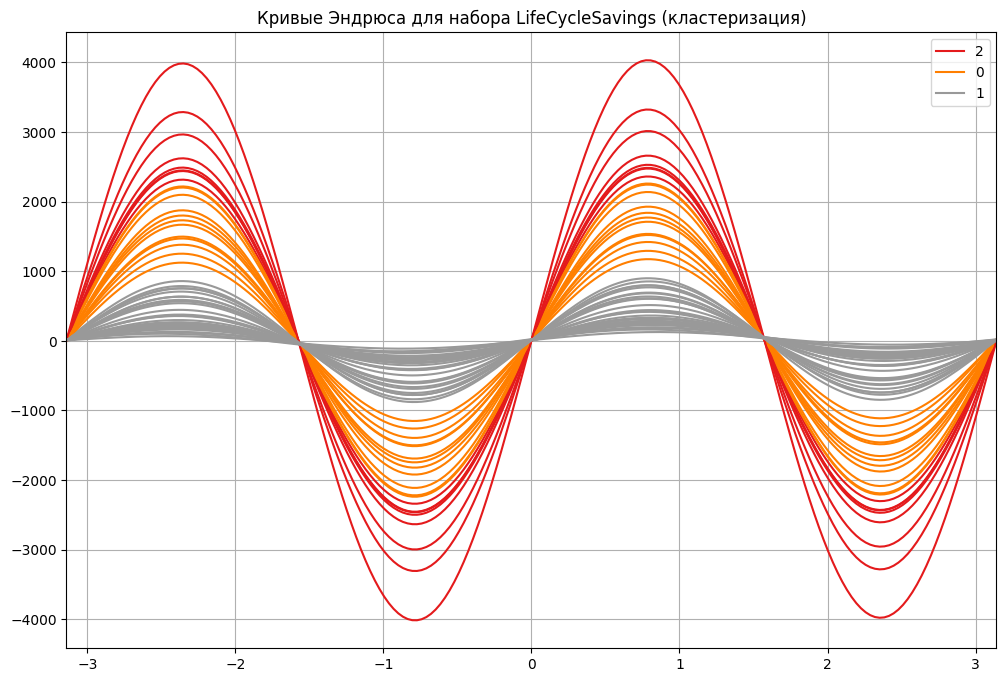

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import andrews_curves
from sklearn.cluster import KMeans

# Загрузка данных
url = "https://vincentarelbundock.github.io/Rdatasets/csv/datasets/LifeCycleSavings.csv"
dfLifeCycleSavings = pd.read_csv(url, index_col=0)

# Посмотрим на данные
print(dfLifeCycleSavings.head())

# Создадим категориальный признак для визуализации
# Например, кластеризуем страны по всем признакам в 3 кластера
kmeans = KMeans(n_clusters=3, random_state=42)
dfLifeCycleSavings['cluster'] = kmeans.fit_predict(dfLifeCycleSavings)

# Визуализация кривых Эндрюса
plt.figure(figsize=(12, 8))
andrews_curves(dfLifeCycleSavings, 'cluster', colormap='Set1')
plt.title("Кривые Эндрюса для набора LifeCycleSavings (кластеризация)")
plt.show()

#### 1б) Построение кривых Эндрюса для набора данных Wine Quality
Код для построения кривых Эндрюса с помощью библиотеки pandas.plotting

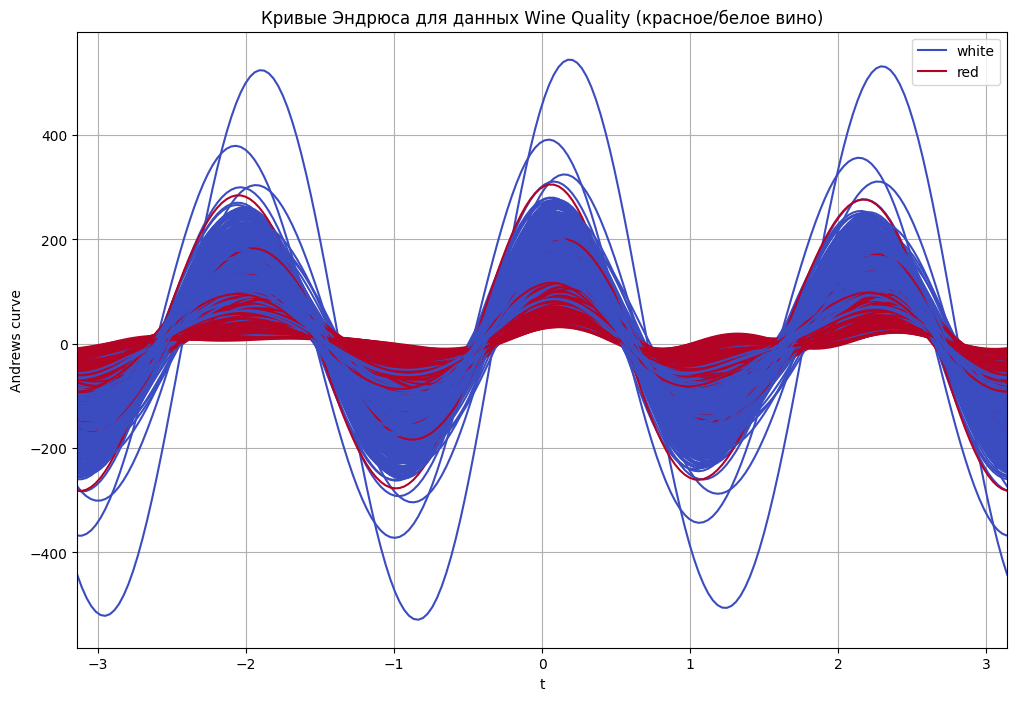

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import andrews_curves

# Для удобства возьмём небольшой случайный поднабор (например, 1000 строк)
df_sample = df.sample(1000, random_state=42).copy()

# Заменим категориальный признак 'type' на числовой (необязательно, но для цветовой дифференциации)
# Встроенная функция andrews_curves умеет работать с категориальной колонкой
plt.figure(figsize=(12, 8))
andrews_curves(df_sample, 'type', colormap='coolwarm')

plt.title("Кривые Эндрюса для данных Wine Quality (красное/белое вино)")
plt.xlabel("t")
plt.ylabel("Andrews curve")
plt.show()

Интерпретация и выводы по однородности  
* Если кривые для разных типов вина (красное и белое) сильно пересекаются и смешаны, то данные однородны, различия между группами незначительны.
* Если кривые образуют отдельные кластеры, то данные неоднородны, группы отличаются по признакам.

Ожидаемый результат:  
* Красное и белое вино по физико-химическим параметрам имеют различия, поэтому кривые Эндрюса должны образовывать две относительно отделённые области.
* Однако внутри каждой группы могут быть вариации, что проявится в разбросе кривых.

Кривые Эндрюса: показывают, что данные имеют выраженное разделение по типу вина, то есть данные неоднородны по этому признаку. Внутри каждой группы данные более однородны, но с вариациями.

### 2) Визуализация данных с помощью лиц Чернова (Chernoff faces)

In [ ]:
!pip install ChernoffFace

In [1]:
from ChernoffFace import *
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

#### 2a) Построение лиц Чернова для LifeCycleSavings
Лица с похожими чертами (набор параметров) принадлежат к одному кластеру — данные внутри кластера однородны.
Значительные различия между лицами из разных кластеров — неоднородность данных.

In [5]:
from ChernoffFace import *

# Выберем признаки для лиц Чернова (все числовые, кроме кластера)
features = dfLifeCycleSavings.columns[:-1].tolist()  # без 'cluster'

# Нормализуем данные для корректного отображения (от 0 до 1)
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data_norm = scaler.fit_transform(dfLifeCycleSavings[features])



In [6]:
data_norm

array([[0.52829268, 0.3019084 , 0.55797101, 0.57264724, 0.16070346],
       [0.5595122 , 0.07175573, 0.92995169, 0.36265477, 0.22498484],
       [0.61317073, 0.09007634, 0.93478261, 0.51611444, 0.21831413],
       [0.25121951, 0.78053435, 0.26811594, 0.02560472, 0.        ],
       [0.59902439, 0.79198473, 0.06521739, 0.16343935, 0.26318981],
       [0.3995122 , 0.39236641, 0.5531401 , 0.73958011, 0.13402062],
       [0.        , 0.69847328, 0.1884058 , 0.14667195, 0.14857489],
       [0.55121951, 0.88969466, 0.02657005, 0.05126056, 0.3814433 ],
       [0.21365854, 0.96183206, 0.12077295, 0.04797148, 0.17343845],
       [0.49658537, 1.        , 0.14009662, 0.09770122, 0.15645846],
       [0.79268293, 0.11374046, 0.81400966, 0.6152877 , 0.22862341],
       [0.14585366, 0.94923664, 0.15217391, 0.05081332, 0.11946634],
       [0.51902439, 0.24427481, 0.43719807, 0.40693339, 0.24863554],
       [0.58731707, 0.13816794, 1.        , 0.54303786, 0.2607641 ],
       [0.58292683, 0.07137405, 0.

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x

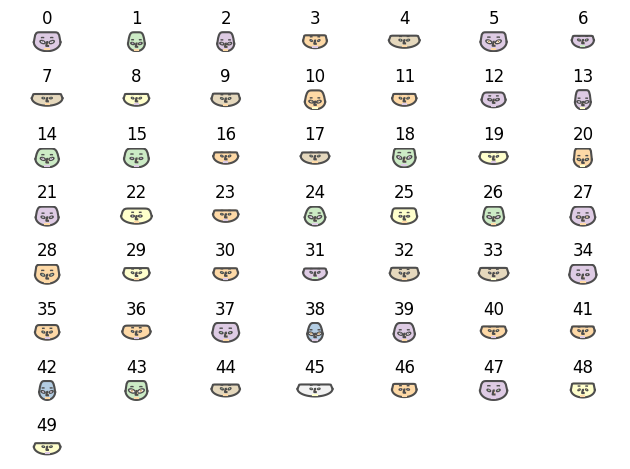

In [ ]:
import matplotlib.cm
import matplotlib.pyplot as plt


def plot_chernoff_faces_saving(data, labels, n_faces=9):

    fig = chernoff_face(data=data, 
                    titles=[str(x) for x in list(range(len(data)))], 
                    color_mapper=matplotlib.cm.Pastel1)
    fig.tight_layout()
    plt.show()

plot_chernoff_faces_saving(data_norm, labels)


#### 2б) Построение лиц Чернова для Wine Quality
Интерпретация и выводы по однородности
* Если лица сильно различаются между группами (красное/белое), значит данные неоднородны.
* Если лица внутри группы похожи, то группа однородна.
* Лица Чернова позволяют быстро визуально сравнить объекты и выявить аномалии.

Мы загружаем данные красного и белого вина, объединяем их и добавляем колонку с типом вина.
Из 11 признаков выбираем 10 для построения лиц Чернова (ограничение пакета).
Нормализуем признаки в диапазон [0,1], так как пакет ожидает значения в этом диапазоне для отображения.
Строим первые 10 лиц с подписями типа вина.

In [8]:
from sklearn.preprocessing import MinMaxScaler
# Выберем несколько признаков для лиц Чернова (максимум 10 признаков)
features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
            'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
            'pH', 'sulphates']

# Нормализуем признаки для корректного отображения (от 0 до 1)
scaler = MinMaxScaler()
data_norm_df = scaler.fit_transform(df[features])


In [ ]:
data_norm_df

array([[0.29752066, 0.41333333, 0.        , ..., 0.20609215, 0.6124031 ,
        0.19101124],
       [0.33057851, 0.53333333, 0.        , ..., 0.18681319, 0.37209302,
        0.25842697],
       [0.33057851, 0.45333333, 0.02409639, ..., 0.19066898, 0.41860465,
        0.24157303],
       ...,
       [0.2231405 , 0.10666667, 0.11445783, ..., 0.10468479, 0.20930233,
        0.13483146],
       [0.14049587, 0.14      , 0.18072289, ..., 0.03046077, 0.48062016,
        0.08988764],
       [0.18181818, 0.08666667, 0.22891566, ..., 0.04434162, 0.41860465,
        0.05617978]])

In [ ]:
from ChernoffFace import *
import matplotlib.cm
import matplotlib.pyplot as plt


fig = chernoff_face(data=data_norm_df, 
                    titles=[str(x) for x in list(range(len(data_norm_df)))], 
                    color_mapper=matplotlib.cm.Pastel1)
fig.tight_layout()
plt.show()

Интерпретация и выводы по однородности
* Если лица сильно различаются между группами (красное/белое), значит данные неоднородны.
* Если лица внутри группы похожи, то группа однородна.
* Лица Чернова позволяют быстро визуально сравнить объекты и выявить аномалии.

Лица Чернова: визуально подтверждают неоднородность данных, так как лица красного и белого вина отличаются по параметрам, отражающим физико-химические свойства.

### 3) Выводы по второй части задания

Кривые Эндрюса и лица Чернова показывают, что данные LifeCycleSavings можно разбить на несколько групп (кластеров), внутри которых объекты более однородны. Между кластерами наблюдаются значимые различия, что говорит о неоднородности исходного набора данных. Таким образом, данные не являются однородными по всем признакам, а имеют внутреннюю структуру.